# data corruption effect on performance

scores:
[[ 0.583446  0.919725  0.860294  0.896988  0.909721  0.843709  0.908658
   0.646209  0.56338   0.7925  ]
 [ 0.566828  0.930046  0.862745  0.886917  0.90512   0.843301  0.908292
   0.66065   0.535211  0.7888  ]
 [ 0.526242  0.919725  0.833333  0.880208  0.904378  0.839226  0.911221
   0.689531  0.56338   0.7852  ]
 [ 0.518033  0.915138  0.848039  0.878958  0.900618  0.834641  0.909573
   0.685921  0.521127  0.7791  ]
 [ 0.494477  0.923165  0.835784  0.873698  0.896636  0.830871  0.903533
   0.638989  0.535211  0.7703  ]
 [ 0.512871  0.915138  0.791667  0.862056  0.894286  0.826592  0.90097
   0.617329  0.56338   0.7649  ]
 [ 0.469402  0.90711   0.772059  0.849589  0.886025  0.823943  0.898407
   0.65343   0.521127  0.7535  ]
 [ 0.485648  0.924312  0.794118  0.842829  0.884022  0.814162  0.892001
   0.646209  0.56338   0.7607  ]
 [ 0.460924  0.908257  0.754902  0.820354  0.871135  0.809068  0.883031
   0.610108  0.56338   0.7424  ]
 [ 0.474759  0.916284  0.727941  0.800662  0.874

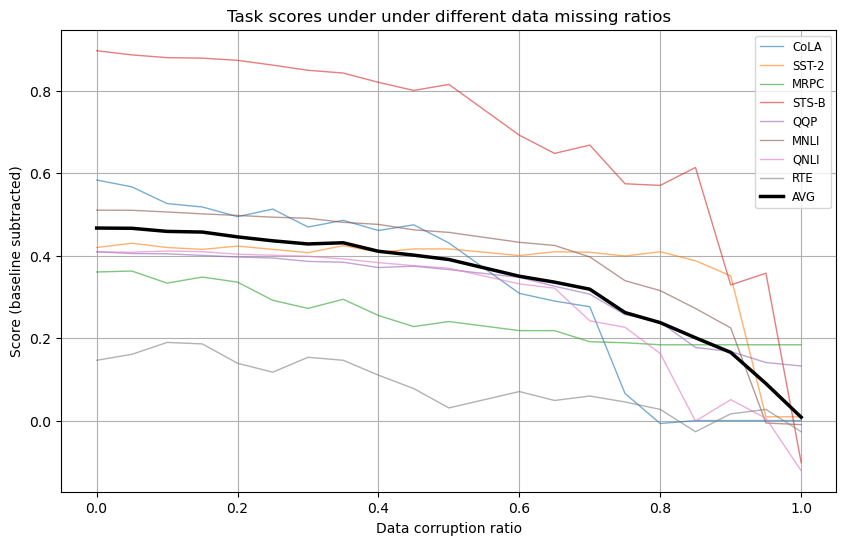

In [49]:
# data corruption effect on performance
# missing data
import numpy as np
import matplotlib.pyplot as plt

# Define the corruption ratios and labels
corruption_ratios = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 
                     0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
labels = ['CoLA', 'SST-2', 'MRPC', 'STS-B', 'QQP', 'MNLI', 'QNLI', 'RTE', 'WNLI', 'AVG']
labels2 = ['cola', 'sst2', 'mrpc', 'stsb', 'qqp', 'mnli', 'qnli', 'rte', 'wnli', 'glue']
scores = np.zeros((len(corruption_ratios), len(labels)))

# File path
file_path = "save/the_effect_of_data_missing/miss_summary.txt"

# Parse the file and populate the scores array
with open(file_path, 'r') as file:
    lines = file.readlines()
    corruption_index = -1
    for line in lines:
        if line.startswith("corruption_ratio"):
            corruption_index += 1
        elif line.strip().startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8')):
            parts = line.split()
            task_index = labels2.index(parts[1].lower())
            scores[corruption_index, task_index] = float(parts[2])
        elif line.startswith("GLUE"):
            parts = line.split()
            task_index = 9
            scores[corruption_index, task_index] = float(parts[2])

print("scores:")
print(scores)
# score[i, j] means corruption level i, task j

# recompute the average ignoring the 'wnli'
scores_ignore_wnli = scores[:, :-2]
# substract the baseline values
scores_ignore_wnli[:, 1] = scores_ignore_wnli[:, 1] - 0.5  # SST2, index 1, binary classification
scores_ignore_wnli[:, 2] = scores_ignore_wnli[:, 2] - 0.5  # MRPC, index 2, binary classification
scores_ignore_wnli[:, 4] = scores_ignore_wnli[:, 4] - 0.5  # QQP, index 4, binary classification
scores_ignore_wnli[:, 5] = scores_ignore_wnli[:, 5] - 0.33333  # MNLI, index 5, tenary classification
scores_ignore_wnli[:, 6] = scores_ignore_wnli[:, 6] - 0.5  # QNLI, index 6, binary classification
scores_ignore_wnli[:, 7] = scores_ignore_wnli[:, 7] - 0.5  # RTE, index 7, binary classification
avg = scores_ignore_wnli.mean(axis=1)  # new avg
labels_ignore_wnli = ['CoLA', 'SST-2', 'MRPC', 'STS-B', 'QQP', 'MNLI', 'QNLI', 'RTE']

print("=========================")
print("scores_ignore_wnli:")
print(scores_ignore_wnli)
print('avg')
print(avg)

# Plot the data
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels_ignore_wnli):
    plt.plot(corruption_ratios, scores_ignore_wnli[:, i], label=label, alpha=0.6, linewidth=1)

plt.plot(corruption_ratios, avg, label="AVG", color="black", linewidth=2.5)
plt.xlabel("Data corruption ratio")
plt.ylabel("Score (baseline subtracted)")
plt.title("Task scores under under different data missing ratios")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()




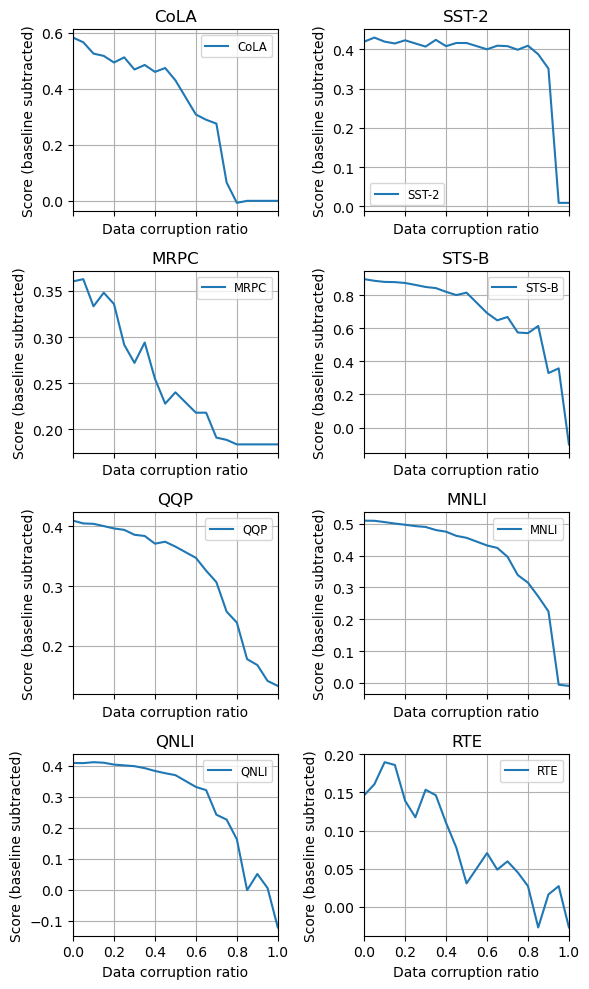

In [50]:
# Plot the data in subplots
fig, axes = plt.subplots(4, 2, figsize=(6, 10), sharex=True)
axes = axes.flatten()

for i, label in enumerate(labels_ignore_wnli):
    ax = axes[i]
    ax.plot(corruption_ratios, scores_ignore_wnli[:, i], label=label)
    
    ax.set_title(label)
    ax.grid(True)
    ax.set_xlim(0, 1)  # Set x-axis limits
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])  # Custom x-axis ticks
    ax.set_xlabel("Data corruption ratio")
    ax.set_ylabel("Score (baseline subtracted)")
    ax.legend(fontsize='small')

# Hide any unused subplots
for ax in axes[len(labels):]:
    ax.axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

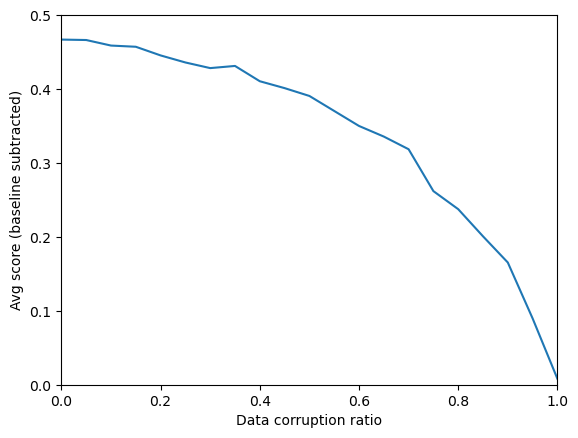

In [51]:
plt.plot(corruption_ratios, avg)
plt.xlabel('Data corruption ratio')
plt.ylabel('Avg score (baseline subtracted)')
plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.show()

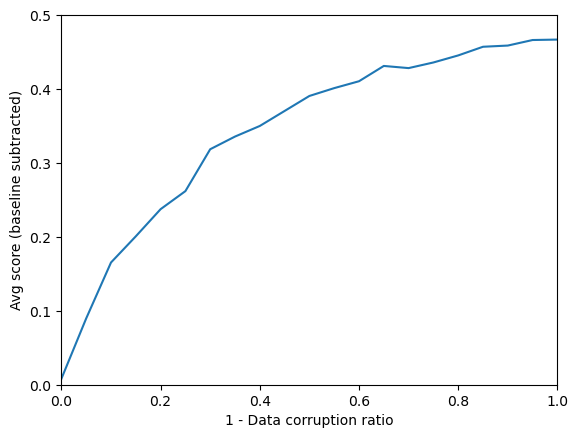

In [52]:
one_minus_corruption_ratios = 1 - np.array(corruption_ratios)
avg = np.array(avg)
plt.plot(one_minus_corruption_ratios, avg)
plt.xlabel('1 - Data corruption ratio')
plt.ylabel('Avg score (baseline subtracted)')
plt.ylim(0, 0.5)
plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.show()

In [53]:
print(corruption_ratios)
print(avg)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[0.4669275  0.46632113 0.45881675 0.45719887 0.44547788 0.43594738
 0.42832937 0.43124638 0.41055612 0.40123975 0.39064663 0.35005938
 0.335707   0.3185675  0.26190375 0.23749662 0.20075337 0.1653535
 0.08972487 0.00809125]


Fitted parameters: a = 0.475, b = 3.517
R-squared: 0.995


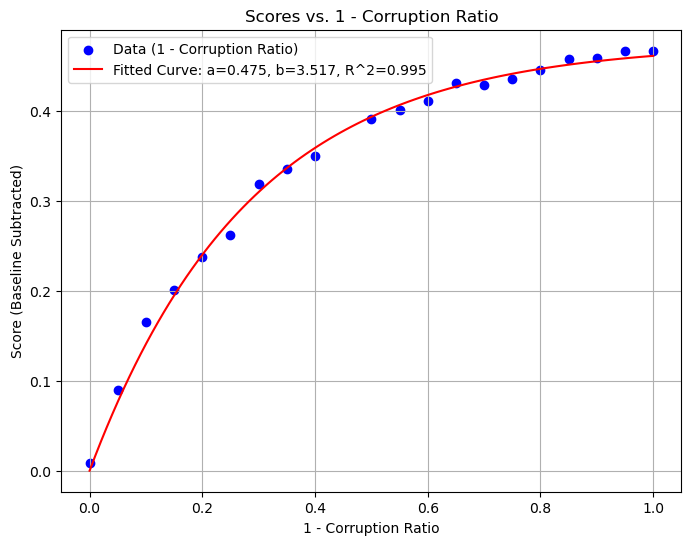

In [58]:
# curve fitting
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
x_data = one_minus_corruption_ratios  # 1 - corruption ratio
y_data = avg  # Performance scores (baseline subtracted)

# Define the exponential CDF function
def exp_cdf(x, a, b):
    """
    Exponential cumulative distribution function.
    Args:
        x: Independent variable (1 - corruption ratio).
        a: Maximum score (upper bound).
        b: Growth rate parameter.
    Returns:
        Score at x.
    """
    return a * (1 - np.exp(-b * x))

# Fit the function to the data
params, covariance = curve_fit(exp_cdf, x_data, y_data, p0=[0.5, 1])  # Initial guesses: a=0.5, b=1

# Extract fitted parameters
a_fit, b_fit = params

# Generate fitted curve data for plotting
x_fit = np.linspace(0, 1, 100)  # Smooth x values for the fitted curve
y_fit = exp_cdf(x_fit, a_fit, b_fit)  # Fitted y values

# Calculate the quality of fit (R-squared)
residuals = y_data - exp_cdf(x_data, *params)  # Residuals
ss_res = np.sum(residuals**2)  # Residual sum of squares
ss_tot = np.sum((y_data - np.mean(y_data))**2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Print fitted parameters and R-squared
print(f"Fitted parameters: a = {a_fit:.3f}, b = {b_fit:.3f}")
print(f"R-squared: {r_squared:.3f}")

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label="Data (1 - Corruption Ratio)", color="blue")
plt.plot(x_fit, y_fit, label=f"Fitted Curve: a={a_fit:.3f}, b={b_fit:.3f}, R^2={r_squared:.3f}", color="red")
plt.xlabel("1 - Corruption Ratio")
plt.ylabel("Score (Baseline Subtracted)")
plt.title("Scores vs. 1 - Corruption Ratio")
plt.legend()
plt.grid()
plt.show()

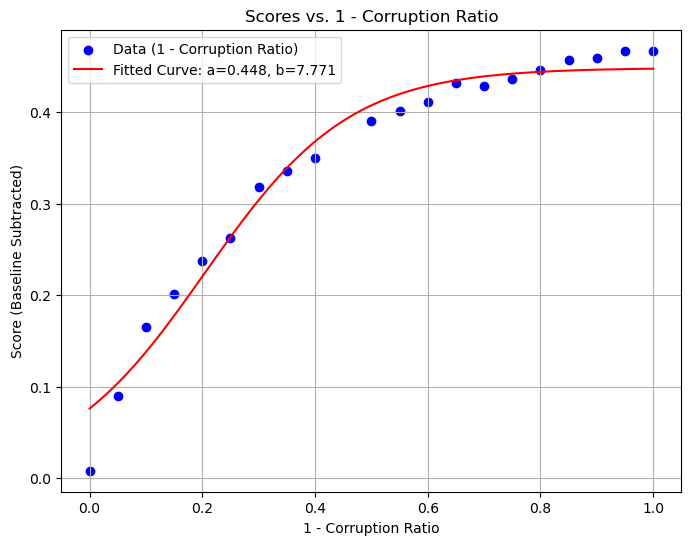

Fitted parameters: a = 0.448, b = 7.771, c = 0.204
R-squared: 0.974


In [65]:
# curve fitting by logistic
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
x_data = one_minus_corruption_ratios  # 1 - corruption ratio
y_data = np.asarray(avg)  # Performance scores (baseline subtracted)

# Define the exponential CDF function
def exp_cdf(x, a, b, c):
    """
    Exponential cumulative distribution function.
    Args:
        x: Independent variable (1 - corruption ratio).
        a: Maximum score (upper bound).
        b: Growth rate parameter.
    Returns:
        Score at x.
    """
    return a / (1 + np.exp(-b * (x - c)))

# Fit the function to the data
params, covariance = curve_fit(exp_cdf, x_data, y_data, p0=[0.5, 1, 0.5])  # Initial guesses: a=0.5, b=1

# Extract fitted parameters
(a_fit, b_fit, c_fit) = params

# Generate fitted curve data for plotting
x_fit = np.linspace(0, 1, 100)  # Smooth x values for the fitted curve
y_fit = exp_cdf(x_fit, a_fit, b_fit, c_fit)  # Fitted y values

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label="Data (1 - Corruption Ratio)", color="blue")
plt.plot(x_fit, y_fit, label=f"Fitted Curve: a={a_fit:.3f}, b={b_fit:.3f}", color="red")
plt.xlabel("1 - Corruption Ratio")
plt.ylabel("Score (Baseline Subtracted)")
plt.title("Scores vs. 1 - Corruption Ratio")
plt.legend()
plt.grid()
plt.show()

# Calculate the quality of fit (R-squared)
residuals = y_data - exp_cdf(x_data, *params)  # Residuals
ss_res = np.sum(residuals**2)  # Residual sum of squares
ss_tot = np.sum((y_data - np.mean(y_data))**2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Print fitted parameters and R-squared
print(f"Fitted parameters: a = {a_fit:.3f}, b = {b_fit:.3f}, c = {c_fit:.3f}")
print(f"R-squared: {r_squared:.3f}")

Fitted parameters: a = 0.496, b = 0.437
R-squared: 0.979


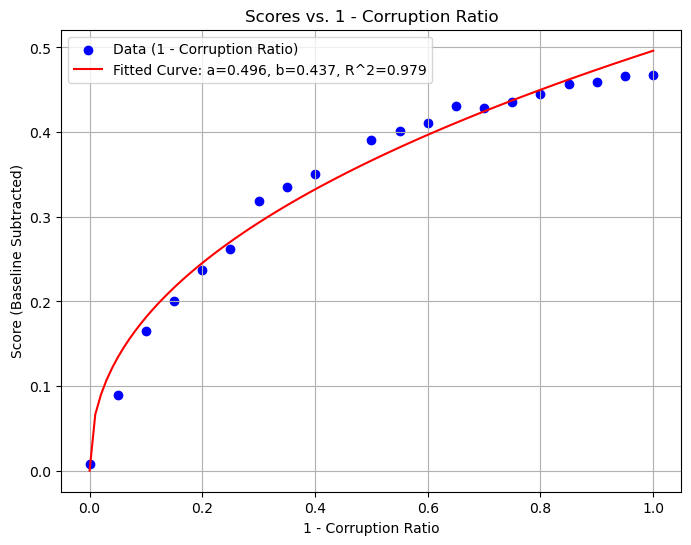

In [68]:
# curve fitting
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
x_data = one_minus_corruption_ratios  # 1 - corruption ratio
y_data = avg  # Performance scores (baseline subtracted)

# Define the exponential CDF function
def exp_cdf(x, a, b):
    """
    Exponential cumulative distribution function.
    Args:
        x: Independent variable (1 - corruption ratio).
        a: Maximum score (upper bound).
        b: Growth rate parameter.
    Returns:
        Score at x.
    """
    return a * np.power(x, b)

# Fit the function to the data
params, covariance = curve_fit(exp_cdf, x_data, y_data, p0=[1.0, 0.5])  # Initial guesses: a=0.5, b=1

# Extract fitted parameters
a_fit, b_fit = params

# Generate fitted curve data for plotting
x_fit = np.linspace(0, 1, 100)  # Smooth x values for the fitted curve
y_fit = exp_cdf(x_fit, a_fit, b_fit)  # Fitted y values

# Calculate the quality of fit (R-squared)
residuals = y_data - exp_cdf(x_data, *params)  # Residuals
ss_res = np.sum(residuals**2)  # Residual sum of squares
ss_tot = np.sum((y_data - np.mean(y_data))**2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Print fitted parameters and R-squared
print(f"Fitted parameters: a = {a_fit:.3f}, b = {b_fit:.3f}")
print(f"R-squared: {r_squared:.3f}")

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label="Data (1 - Corruption Ratio)", color="blue")
plt.plot(x_fit, y_fit, label=f"Fitted Curve: a={a_fit:.3f}, b={b_fit:.3f}, R^2={r_squared:.3f}", color="red")
plt.xlabel("1 - Corruption Ratio")
plt.ylabel("Score (Baseline Subtracted)")
plt.title("Scores vs. 1 - Corruption Ratio")
plt.legend()
plt.grid()
plt.show()